<a href="https://colab.research.google.com/github/testgithubprecious/Ml_projects/blob/main/CIFAR_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CNN for image classification**

In this project, we build a CNN model using Keras to classify images from the CIFAR-10 dataset, which contains 60,000 32x32 color images across 10 classes(e.g airplanes, cars, birds).



Convolutional Neural network is a deep learning model designed to automatically and adaptively learn spatial hierarchies of features (This means the visual information is organized and processed in multiple layers from low-level features to high-level representations) from images.   It uses convolutional layers instead of fully connected layers because the former looks at small parts of the image at a time and learns patterns while the latter looks at every single pixel in the image separately.
The role of CNN is to extract features from the input using filters that slide across the image.




In [ ]:
# import the required modules
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


In [ ]:
# Normalize input data
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [ ]:
# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
# Build the neural network model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2),),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 57s 175ms/step - accuracy: 0.1021 - loss: 5.6127 - val_accuracy: 0.0978 - val_loss: 2.3027
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 51s 163ms/step - accuracy: 0.0964 - loss: 2.3026 - val_accuracy: 0.0977 - val_loss: 2.3027
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 48s 155ms/step - accuracy: 0.0987 - loss: 2.3041 - val_accuracy: 0.0952 - val_loss: 2.3027
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 149ms/step - accuracy: 0.0992 - loss: 2.3027 - val_accuracy: 0.0951 - val_loss: 2.3028
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 48s 154ms/step - accuracy: 0.1003 - loss: 2.3026 - val_accuracy: 0.0952 - val_loss: 2.3027
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 91s 183ms/step - accuracy: 0.1031 - loss: 2.3026 - val_accuracy: 0.0979 - val_loss: 2.3027
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 61s 193ms/step - accuracy: 0.0973 - loss: 2.3027 - val_accuracy: 0.0952 - val_loss: 2.3027
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 62s 199ms/step - accuracy: 0.1017 - loss: 2

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n Test Accuracy: {test_acc:4f}")

# Show predictions on a few test images
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Predict on a few test samples
predictions = model.predict(x_test[:10])


 Test Accuracy: 0.100100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


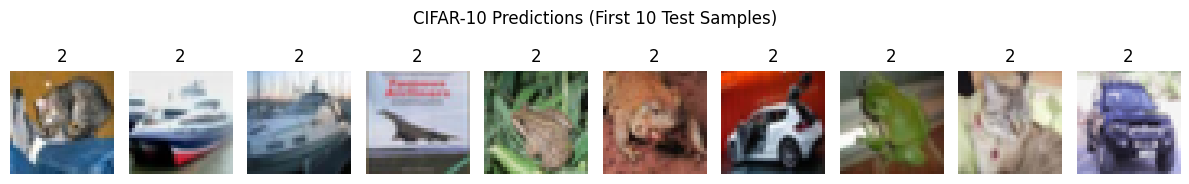

In [ ]:
# Plot some test results
plt.figure(figsize=(12, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_test[i])
    plt.title(np.argmax(predictions[i]))
    plt.axis('off')
plt.suptitle("CIFAR-10 Predictions (First 10 Test Samples)")
plt.tight_layout()
plt.show()